![](http://i.huffpost.com/gen/1257884/images/o-BRAIN-MAPPING-facebook.jpg)

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

import os


Linear Regression by scratch using Python. Comparing with Sklearn Linear Regression model

In [14]:
print("Reading the csv file and looking at the first five rows :\n")
headbrain = pd.read_csv("headbrain.csv")
print(headbrain.head())
#y=mx+c


Reading the csv file and looking at the first five rows :

   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [15]:
print(headbrain.shape)

(237, 4)


In [16]:
print("HeadBrain Info :\n")
print(headbrain.info())

HeadBrain Info :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB
None


In [17]:
print("Checking for any null values:\n")
print(headbrain.isnull().any())

Checking for any null values:

Gender                 False
Age Range              False
Head Size(cm^3)        False
Brain Weight(grams)    False
dtype: bool


In [18]:
print("Checking for unique values in each column:\n")
print(headbrain.nunique())

Checking for unique values in each column:

Gender                   2
Age Range                2
Head Size(cm^3)        221
Brain Weight(grams)    146
dtype: int64


Let's plot a scatter plot for Head Size again Brain Weight

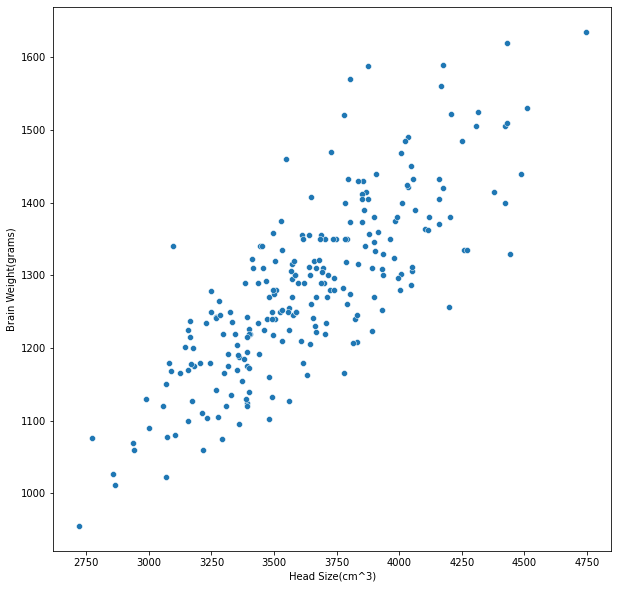

In [19]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='Brain Weight(grams)',x='Head Size(cm^3)',data=headbrain)
plt.show()

We are interested only the Head Size(independent) and Brain Weight(dependent) for this exercise, so let's get in X and Y

In [20]:
headbrain  = headbrain.values

X = headbrain[:,2]
Y = headbrain[:,3]

X.shape,Y.shape

((237,), (237,))

Linear Regression model are used to show or predict the relationship between a dependent variable (target variable) and independent variable(s).
It can be used to check if there exists any correlation between the variables.

1. Simple Linear Regression -> relationship between just two variables (a dependent Vs an independent)
2. Multiple Regression -> relationship between two or more variables ( a dependent Vs 2 or more independent) 

The current data set in an example of Simple Linear Regression. We have a target or the dependent variable,which is Brain Weight. The independent variable here is the Head Size.

The formula goes like this - 

y = mx+c

Where , 

c - is the  y-intercept

m - is the slope /  coefficient -> this quantity effects the values of y

In our example -

BrainWeight = m * HeadSize + constant

constant = BrainWeight - (m * HeadSize)

**Calculate the slope and y-intercept**

In [21]:
def Linear_Regression(X,Y):
    mean_x = np.mean(X)
    mean_y = np.mean(Y)

    n = len(X)
    numerator= 0
    denominator=0
    for i in range(n):
        numerator   += ((X[i] - mean_x) * (Y[i] - mean_y))
        denominator += ((X[i] - mean_x) ** 2)

    m = numerator/ denominator
    c = mean_y - m * mean_x
    
    return(m,c)

def predict(X,m,c):
    pred_y=[]
    for i in range(len(X)):
        pred_y.append(c + m * X[i])

    return(pred_y)


**Now let's calculate the R-Square value (Coefficient of determination)**

y_obs         -> observed data 

y_pred        -> predicted value of y from the formula (y=mx+c)

y_hat         -> mean of y_obs

total_sum_of_squares(ss_tot) -> sum( (y_obs - y_hat)  ** 2 )

sum_of_squares(ss_res)       -> sum( (y_obs - y_pred) ** 2 )

r2 -> 1 - total_sum_of_squares/sum_of_squares

In [22]:
def r2score(y_obs,y_pred):
    yhat = np.mean(y_obs)
    
    ss_res = 0.0
    ss_tot = 0.0
    
    for i in range(len(y_obs)):
        ss_tot += (y_obs[i]-yhat)**2
        ss_res += (y_obs[i]-y_pred[i])**2
        
    r2 = 1 - (ss_res/ss_tot)

    return r2


**Let's calulate the Linear Regression and plot the data points **

slope =  0.25754334775031174
intercept =  348.81711683223796
R-squared : 0.7005524688900855


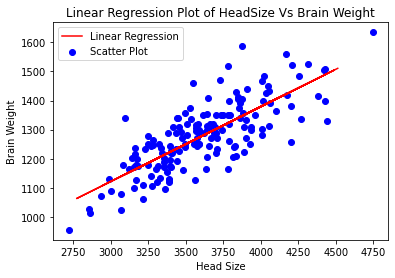

In [23]:
plt.title("Linear Regression Plot of HeadSize Vs Brain Weight")

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

m,c = Linear_Regression(X_train,y_train)
print("slope = ", m)
print('intercept = ',c)
      
y_pred =  predict(X_test,m,c)

print("R-squared :",r2score(y_test,y_pred))

plt.plot(X_test,y_pred,color='red',label='Linear Regression')
plt.scatter(X_train,y_train,c='b',label='Scatter Plot')
plt.xlabel("Head Size")
plt.ylabel("Brain Weight")
plt.legend()
plt.show()

**We can see this using the inbuilt Sklearn Linear Regression model**

In [25]:
#Reshape the input data into 2D array
X = X.reshape(len(X),1)

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

reg = LinearRegression()
reg.fit(X_train,y_train)

y_predictions = reg.predict(X_test)

print("R-squared :",r2_score(y_test, y_predictions))


R-squared : 0.7103470441357391
